In [1]:
from MOT import MOT
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
params = {
        'd':1.2,
        'thred_s':0.3,
        'N':20,
        'delta_thred' : 1e-3,
        'step':0.1,
        'win_size':(5,13),
        'eps': 1.5,
        'min_samples':16
}
A = np.array( # x,y,l,w,h,,x',y',l',w',h',x'',y''
[[1,0,0,0,0,1,0,0,0,0,.5, 0],
    [0,1,0,0,0,0,1,0,0,0, 0,.5],
    [0,0,1,0,0,0,0,1,0,0, 0, 0],
    [0,0,0,1,0,0,0,0,1,0, 0, 0],
    [0,0,0,0,1,0,0,0,0,1, 0, 0],
    [0,0,0,0,0,1,0,0,0,0, 1, 0],
    [0,0,0,0,0,0,1,0,0,0, 0, 1],
    [0,0,0,0,0,0,0,1,0,0, 0, 0],
    [0,0,0,0,0,0,0,0,1,0, 0, 0],
    [0,0,0,0,0,0,0,0,0,1, 0, 0],
    [0,0,0,0,0,0,0,0,0,0, 1, 0],
    [0,0,0,0,0,0,0,0,0,0, 0, 1]]
    )
Q = np.diag([1,1,1,1,1,1,1,1,1,1,1,1])*0.01
H = np.array([[1,0,0,0,0,0,0,0,0,0,0,0],
            [0,1,0,0,0,0,0,0,0,0,0,0],
            [0,0,1,0,0,0,0,0,0,0,0,0],
            [0,0,0,1,0,0,0,0,0,0,0,0],
            [0,0,0,0,1,0,0,0,0,0,0,0]])
R = np.diag([10,10,0.1,0.1,0.1])
P = np.diag([1,1,1,1,1,1,1,1,1,1,1,1])
missing_thred = 7
os.chdir(r'/Users/czhui960/Documents/Lidar/RawLidarData/FrameSamplingTest')
mot = MOT(r'./2020-7-27-10-30-0.pcap',ending_frame=1000,background_update_frame = 100,**params)
mot.initialization()
mot.mot_tracking(missing_thred,A,P,H,Q,R)

  2%|▏         | 2/100 [00:00<00:04, 19.60it/s]

Initialization...


100%|██████████| 100/100 [00:04<00:00, 22.19it/s]


Generating Threshold Map


Tracking 100 frame:  10%|▉         | 99/999 [00:09<01:12, 12.40it/s]

Generating Threshold Map


Tracking 200 frame:  20%|█▉        | 199/999 [00:19<01:02, 12.79it/s]

Generating Threshold Map


Tracking 300 frame:  30%|██▉       | 299/999 [00:28<01:04, 10.91it/s]

Generating Threshold Map


Tracking 400 frame:  40%|███▉      | 399/999 [00:37<00:50, 11.97it/s]

Generating Threshold Map


Tracking 500 frame:  50%|████▉     | 499/999 [00:48<00:57,  8.69it/s]

Generating Threshold Map


Tracking 600 frame:  60%|█████▉    | 599/999 [01:02<00:53,  7.44it/s]

Generating Threshold Map


Tracking 700 frame:  70%|██████▉   | 699/999 [01:17<00:42,  7.06it/s]

Generating Threshold Map


Tracking 800 frame:  80%|███████▉  | 799/999 [01:31<00:23,  8.54it/s]

Generating Threshold Map


Tracking 900 frame:  90%|████████▉ | 899/999 [01:42<00:11,  8.93it/s]

Generating Threshold Map


Tracking 999 frame: 100%|██████████| 999/999 [01:55<00:00,  8.66it/s]


In [3]:
mot.save_result()

 23%|██▎       | 32/138 [00:00<00:00, 314.27it/s]

Generating Traj Files...


100%|██████████| 138/138 [00:00<00:00, 328.62it/s]


In [7]:
'{}.csv'.format(1)

'1.csv'

In [10]:
mot.traj_path + '/{}.csv'.format(1)

'/Users/czhui960/Documents/Lidar/RawLidarData/FrameSamplingTest/Output File/Output Trajs/1.csv'

In [5]:
os.path.join((mot.traj_path))

TypeError: expected str, bytes or os.PathLike object, not tuple

In [4]:
mot.traj_path

'/Users/czhui960/Documents/Lidar/RawLidarData/FrameSamplingTest/Output File/Output Trajs'

In [33]:
col_names_ = ['X_Coord_est','Y_Coord_est','X_Len_est','Y_Len_est','Z_Len_est','X_Vel_est','Y_Vel_est','X_Acc_est','Y_Acc_est']
col_names = ['X_Coord_mea','Y_Coord_mea','X_Len_mea','Y_Len_mea','Z_Len_mea']

#xylwh xylwh, xy


In [56]:
def get_summary_file(post_seq,mea_seq):
    temp = np.array(post_seq)
    temp = temp.reshape(temp.shape[0],temp.shape[1])[:,[0,1,2,3,4,5,6,10,11]]
    df_ = pd.DataFrame(temp,columns= col_names_)
    temp = mea_seq
    emp = []
    for i,vec in enumerate(temp):
        if type(vec) == int:
            emp.append(-np.ones(len(col_names)).astype(np.int8))
        else:
            emp.append(vec.flatten())
    emp = np.array(emp)
    df = pd.DataFrame(emp,columns = col_names)
    summary = pd.concat([df,df_],axis = 1)
    return summary

In [59]:
get_summary_file(mot.Off_tracking_pool[0].post_seq,mot.Off_tracking_pool[0].mea_seq)

,X_Coord_mea,Y_Coord_mea,X_Len_mea,Y_Len_mea,Z_Len_mea,X_Coord_est,Y_Coord_est,X_Len_est,Y_Len_est,Z_Len_est,X_Vel_est,Y_Vel_est,X_Acc_est,Y_Acc_est
0,-11.880474,-24.119835,5.745061,3.441625,1.998897,-11.880474,-24.119835,5.745061,3.441625,1.998897,0.000000,0.000000,0.000000,0.000000
1,-11.368456,-24.197860,5.664705,3.208388,1.987152,-11.786089,-24.134218,5.668514,3.219442,1.987708,0.062645,-0.009546,0.020882,-0.003182
2,-11.024649,-24.076671,5.496608,2.773913,2.002513,-11.413091,-24.115430,5.512613,2.813978,2.000077,0.291764,0.008050,0.092412,0.003955
3,-10.769361,-24.312410,4.778183,2.917027,1.992186,-10.886457,-24.233133,4.904718,2.823148,1.995657,0.496676,-0.064161,0.125370,-0.018358
4,-10.471005,-24.214727,4.444730,2.422467,2.000417,-10.421378,-24.246366,4.464018,2.497979,1.999413,0.573218,-0.051390,0.113066,-0.010514
5,-10.072756,-24.298818,3.469911,2.307702,1.967476,-9.971196,-24.300333,3.678562,2.295232,1.979858,0.602866,-0.060659,0.094489,-0.010237
6,-9.911183,-24.461892,3.335502,2.340459,1.958870,-9.681882,-24.424673,3.251649,2.236963,1.964841,0.543394,-0.095886,0.063544,-0.015260
7,-9.634861,-24.472575,2.605300,1.973695,1.959636,-9.415524,-24.495672,2.661858,2.016348,1.958006,0.484108,-0.098212,0.040893,-0.012875
8,-9.321026,-24.405228,1.969080,1.654347,2.114373,-9.140911,-24.490922,2.034091,1.730085,2.045329,0.438910,-0.070127,0.026104,-0.005838
9,-8.997133,-24.204979,1.517818,0.871943,1.647589,-8.855288,-24.370207,1.495366,1.141446,1.825907,0.405889,-0.007094,0.016492,0.005358


In [47]:
pd.concat?

In [42]:
df

,X_Coord_mea,Y_Coord_mea,X_Len_mea,Y_Len_mea,Z_Len_mea
0,-12.990322,5.656798,0.374826,0.525902,0.80542
1,1.000000,1.000000,1.000000,1.000000,1.00000
2,1.000000,1.000000,1.000000,1.000000,1.00000
3,1.000000,1.000000,1.000000,1.000000,1.00000
4,1.000000,1.000000,1.000000,1.000000,1.00000
5,1.000000,1.000000,1.000000,1.000000,1.00000
6,-10.709188,8.774693,0.933441,1.016613,0.96545
7,1.000000,1.000000,1.000000,1.000000,1.00000
8,1.000000,1.000000,1.000000,1.000000,1.00000
9,1.000000,1.000000,1.000000,1.000000,1.00000


In [40]:
np.array(emp).shape

(15, 5)

In [36]:
emp

[array([-12.99032218,   5.65679778,   0.37482573,   0.52590197,
          0.80541959]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([-10.70918774,   8.77469311,   0.93344061,   1.01661305,
          0.96544979]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.])]

In [13]:
len(mea_seqs[2])

9

In [10]:
for key in mot.Off_tracking_pool.keys():
    for i in range(len(mot.Off_tracking_pool[key].post_seq)):
        if type(mot.Off_tracking_pool[key].post_seq[i]) == int:
            print(i,key)

In [26]:
lengths = [len(mot.Off_tracking_pool[key].post_seq) for key in mot.Off_tracking_pool.keys()]
post_seqs = [mot.Off_tracking_pool[key].post_seq for key in mot.Off_tracking_pool.keys()]
# post_seqs = [np.array([p_ for p_ in p if type(p_) != int]) for p in post_seqs]
mea_seqs = [mot.Off_tracking_pool[key].mea_seq for key in mot.Off_tracking_pool.keys()]
# mea_seqs = [np.array([p_ for p_ in p if type(p_) != int]) for p in mea_seqs]
# keys = [key for key in mot.Off_tracking_pool]

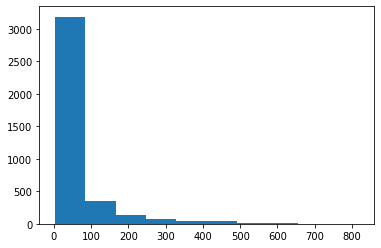

In [6]:
plt.hist(lengths,bins = 10)
plt.show()

In [5]:
key = 1712
plt.figure(figsize = (10,10))
plt.plot(post_seqs[key][:,0],post_seqs[key][:,1],marker = 'o',label = 'Post')
plt.plot(mea_seqs[key][:,0],mea_seqs[key][:,1],marker = 'x',label = 'Mea')
plt.show()

NameError: name 'post_seqs' is not defined

<Figure size 720x720 with 0 Axes>